In [2]:
from matplotlib import pyplot as plt
import csv
import numpy as np
import pandas as pd
import seaborn as sns
from ast import literal_eval
sns.set()
sns.set_style('darkgrid')

In [3]:
def summary_statistics(df):
    atts = ['Age', 'Gen', 'Health', 'Size', 'Speed', 'Sight', 'View', 'Rep', 'Loss']
    summary = pd.DataFrame()
    for att in atts:
        col = pd.DataFrame(df['{}'.format(att)].values.tolist())
        summary['Avg {}'.format(att)] = col.mean(axis=1)
        summary['Std {}'.format(att)] = col.std(axis=1)
    return summary

def plot_stats(df):
    atts = ['Gen', 'Age', 'Health']
    stats = summary_statistics(df)
    steps = df['Step']
    living = df['Living']
    
    plt.figure(figsize=(10,6)) 
    plt.subplot(2,2,1)
    plt.plot(steps, living)
    plt.title('Living')
    for i in range(3):
        att = atts[i]
        plt.subplot(2,2,i+2)
        plt.plot(steps, stats['Avg {}'.format(att)])
        plt.fill_between(steps, stats['Avg {}'.format(att)]+stats['Std {}'.format(att)], stats['Avg {}'.format(att)]-stats['Std {}'.format(att)], alpha=0.15)
        plt.title('Average {}'.format(att))
    plt.tight_layout()
    plt.show()

def plot_attributes(df):
    atts = ['Size', 'Speed', 'Sight', 'View', 'Rep', 'Loss']
    stats = summary_statistics(df)
    steps = df['Step']

    plt.figure(figsize=(10,6))
    for i in range(6):
        att = atts[i]
        plt.subplot(3,2,i+1)
        plt.plot(steps, stats['Avg {}'.format(att)])
        plt.fill_between(steps, stats['Avg {}'.format(att)]+stats['Std {}'.format(att)], stats['Avg {}'.format(att)]-stats['Std {}'.format(att)], alpha=0.15)
        plt.title('Average {}'.format(att))
    plt.tight_layout()
    plt.show()

def plot_last_epoch(df, epoch=1):
    lastage = df['Age'].iloc[-epoch]
    lastgen = df['Gen'].iloc[-epoch]
    plt.figure(figsize=(10,6))
    plt.subplot(2,1,1)
    plt.scatter(range(len(lastage)), lastage)
    plt.title('All Ages in Epoch {}'.format(str(df['Age'].size-epoch)))
    plt.subplot(2,1,2)
    plt.scatter(range(len(lastgen)), lastgen)
    plt.title('All Generations in Epoch {}'.format(str(df['Gen'].size-epoch)))
    plt.tight_layout()
    plt.show()

def plot_evolution(df, noodle_num, epoch=1):
    ancestors = df['Ancestors']
    dna = ancestors[len(ancestors)-epoch][noodle_num]
    zipped = list(zip(*dna))
    sizes = zipped[0]
    speeds = zipped[1]
    sights = [s/10 for s in zipped[2]]
    views = [v/10 for v in zipped[3]]
    reps = [r/10 for r in zipped[4]]
    gens = len(dna)
    plt.plot(range(gens), sizes, range(gens), speeds, range(gens), sights, range(gens), views, range(gens), reps)
    plt.legend(['Size', 'Speed', 'Sight/10', 'View/10', 'Rep/10'], loc=3)
    return 
    
def count_common_ancestor(df, epoch=1, gen=0):
    ancestors = df['Ancestors']
    common = {}
    for tree in ancestors[len(ancestors)-epoch]:
        if len(tree) > gen:
            if str(tree[gen]) in common:
                common[str(tree[gen])] += 1
            else:
                common[str(tree[gen])] = 1
    return common

def old_plot_noodles(df):
    plt.figure(figsize=(10,6)) 
    step = df['Step']
    thangs = ['Living Noodles', 'Age', 'Dead Noodles', 'Health']
    for i in range(0,4):
        plt.subplot(2,2,i+1)
        plt.plot(step, df['{}'.format(thangs[i])])
        plt.title('{}'.format(thangs[i]))
    plt.tight_layout()
    plt.show()

def old_plot_stats(df):
    plt.figure(figsize=(10,6))
    step = df['Step']
    thangs = ['Size', 'Speed', 'Sight', 'View', 'Rep', 'Loss']
    for i in range(0,6):
        plt.subplot(3,2,i+1)
        plt.plot(step, df['{}'.format(thangs[i])])
        plt.title('{}'.format(thangs[i]))
    plt.tight_layout()
    plt.show()

In [4]:
# infile = 'noodle_output.csv'
# infile = 'pred_output.csv'
# infile = 'checkpoint.csv'
# infile = 'pred_checkpoint.csv'
infile = 'data/noodle_trial19.csv'

df = pd.read_csv(infile, converters={'Age': literal_eval, 'Gen': literal_eval, 'Health': literal_eval, 'Size': literal_eval, 'Speed': literal_eval, 'Sight': literal_eval, 'View': literal_eval, 'Rep': literal_eval, 'Loss': literal_eval, 'Ancestors': literal_eval})
df.head()

,Step,Living,Age,Gen,Health,Size,Speed,Sight,View,Rep,Loss,Ancestors
0,0,33,"[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[69.81, 99.86, 69.85, 79.81, 89.89, 79.82, 69....","[7, 10, 7, 8, 9, 8, 7, 10, 7, 6, 9, 9, 6, 8, 7...","[4, 2, 4, 3, 2, 4, 4, 4, 3, 2, 2, 3, 1, 3, 1, ...","[180, 72, 44, 169, 41, 35, 118, 97, 169, 86, 7...","[41, 29, 53, 103, 27, 95, 63, 83, 91, 56, 28, ...","[35, 25, 27, 16, 23, 34, 31, 28, 19, 31, 24, 2...","[19, 14, 15, 19, 11, 18, 18, 23, 17, 10, 12, 1...",[]
1,1000,28,"[1002, 1002, 1002, 1002, 1002, 1002, 1002, 100...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[79.81000000000228, 149.93000000000012, 49.819...","[7, 8, 8, 7, 10, 7, 6, 9, 9, 6, 8, 6, 7, 9, 8,...","[4, 3, 4, 4, 4, 3, 2, 2, 3, 1, 3, 4, 4, 1, 1, ...","[180, 169, 35, 118, 97, 169, 86, 79, 39, 69, 3...","[41, 103, 95, 63, 83, 91, 56, 28, 63, 40, 49, ...","[35, 16, 34, 31, 28, 19, 31, 24, 22, 30, 33, 3...","[19, 19, 18, 18, 23, 17, 10, 12, 15, 8, 12, 18...",[]
2,2000,17,"[2002, 2002, 2002, 2002, 2002, 2002, 2002, 200...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[136.39000000000004, 70.80000000000155, 134.81...","[7, 8, 7, 10, 7, 6, 9, 6, 9, 8, 7, 7, 8, 7, 8,...","[4, 3, 4, 4, 3, 2, 2, 4, 1, 1, 3, 2, 4, 3, 4, ...","[180, 169, 118, 97, 169, 86, 79, 196, 120, 199...","[41, 103, 63, 83, 91, 56, 28, 44, 100, 99, 33,...","[35, 16, 31, 28, 19, 31, 24, 34, 16, 24, 33, 2...","[19, 19, 18, 23, 17, 10, 12, 18, 17, 18, 15, 1...",[]
3,3000,18,"[3002, 3002, 3002, 3002, 3002, 3002, 3002, 300...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, ...","[107.89000000000038, 156.20000000000005, 102.1...","[7, 8, 7, 10, 7, 6, 6, 9, 8, 8, 7, 8, 7, 7, 7,...","[4, 3, 4, 4, 3, 2, 4, 1, 1, 4, 3, 4, 3, 3, 4, ...","[180, 169, 118, 97, 169, 86, 196, 120, 199, 12...","[41, 103, 63, 83, 91, 56, 44, 100, 99, 42, 26,...","[35, 16, 31, 28, 19, 31, 34, 16, 24, 22, 15, 3...","[19, 19, 18, 23, 17, 10, 18, 17, 18, 19, 14, 2...",[]
4,4000,19,"[4002, 4002, 4002, 4002, 4002, 4002, 4002, 400...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, ...","[121.38000000000022, 109.4900000000012, 94.619...","[7, 8, 7, 10, 7, 6, 6, 9, 8, 7, 8, 7, 7, 7, 10...","[4, 3, 4, 4, 3, 2, 4, 1, 1, 3, 4, 3, 3, 4, 4, ...","[180, 169, 118, 97, 169, 86, 196, 120, 199, 17...","[41, 103, 63, 83, 91, 56, 44, 100, 99, 26, 94,...","[35, 16, 31, 28, 19, 31, 34, 16, 24, 15, 32, 1...","[19, 19, 18, 23, 17, 10, 18, 17, 18, 14, 21, 1...",[]


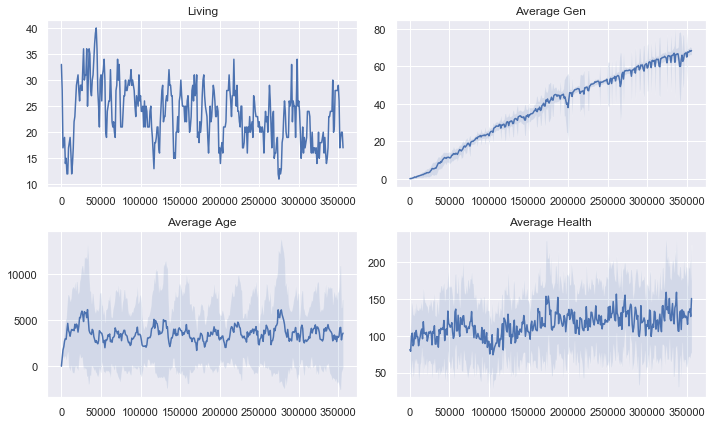

In [5]:
plot_stats(df)

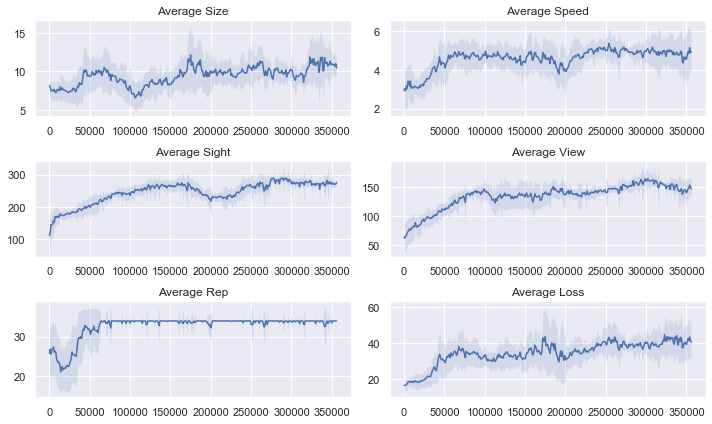

In [6]:
plot_attributes(df)

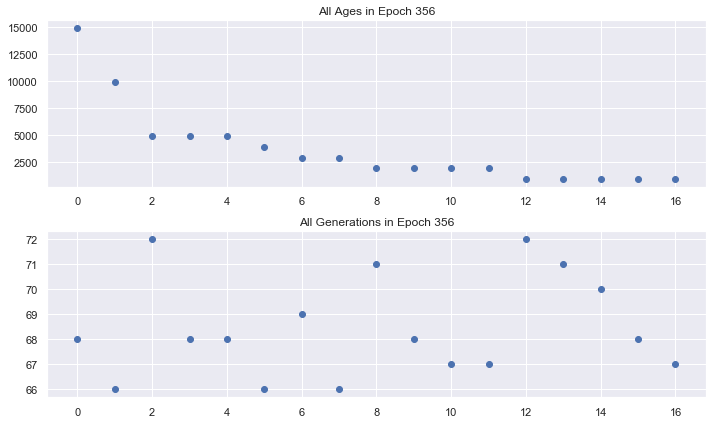

In [7]:
plot_last_epoch(df)

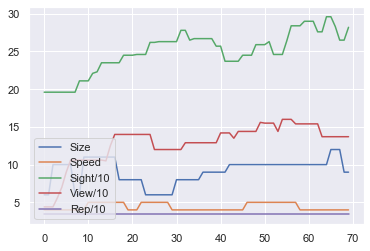

In [8]:
plot_evolution(df,6)

In [9]:
count_common_ancestor(df,1,65)

{'[10, 5, 269, 154, 34]': 5,
 '[12, 4, 296, 137, 34]': 7,
 '[10, 4, 256, 137, 34]': 1,
 '[10, 5, 276, 137, 34]': 4}

In [10]:
trial_num = 19
df.to_csv('Noodle Statistics/noodle_trial{}.csv'.format(trial_num), index=False)